In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statistics

In [4]:
data=pd.read_csv("HCL-2022-2023.csv")
df=pd.DataFrame(data)
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-July-2023,1112.95,1140.00,1096.45,1116.75,1121.283333,115627,9120,129650628.0,56024,48.45,43.55,3.80
1,20-July-2023,1160.00,1161.85,1148.30,1155.20,1153.457186,41178,2315,47497060.0,16691,40.53,13.55,-4.80
2,19-July-2023,1167.00,1174.75,1156.65,1168.50,1166.695366,90410,5253,105480928.0,36125,39.96,18.10,1.50
3,18-July-2023,1154.05,1170.00,1147.15,1167.30,1160.300838,50479,2777,58570826.0,22928,45.42,22.85,13.25
4,17-July-2023,1150.10,1171.80,1144.30,1153.65,1160.672552,171389,10053,198926508.0,85037,49.62,27.50,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,27-July-2022,914.90,929.50,911.05,928.15,923.274439,51946,2100,47960414.0,25094,48.31,18.45,13.25
244,26-July-2022,929.70,929.70,911.25,913.45,918.375909,44697,2535,41048648.0,15947,35.68,18.45,-16.25
245,25-July-2022,919.95,932.00,914.65,930.35,923.319749,121902,3670,112554524.0,82038,67.30,17.35,10.40
246,22-July-2022,931.00,931.25,909.40,920.00,916.772290,132783,4022,121731775.0,79645,59.98,21.85,-11.00


In [5]:
date=df["Date"].tolist()
date=pd.to_datetime(date)
df=df.set_index(date)
close_price=df["Close Price"].tolist()

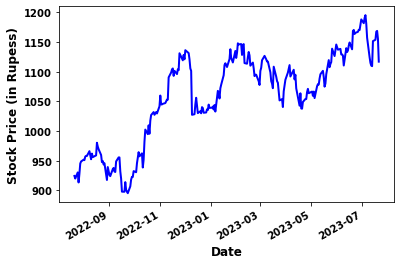

In [6]:
plt.plot(date, close_price,linewidth='2',color='blue')
plt.gcf().autofmt_xdate()
plt.xlabel("Date",weight='bold',size='12')
plt.ylabel("Stock Price (in Rupess)",weight='bold',size='12')
plt.xticks(size='10',weight='bold')
plt.yticks(size='10',weight='bold')
#plt.savefig("HCL_stock_data.png",dpi=1200)
plt.show()

In [7]:
n=len(close_price)
Return=[(close_price[i-1]-close_price[i])*100/close_price[i] for i in range(n-1,0,-1)]
days=[i for i in range(n-1,0,-1)]

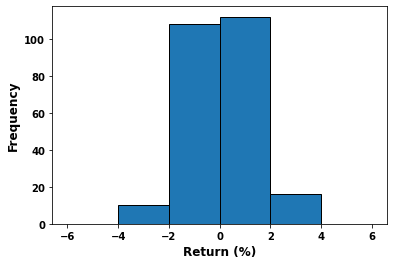

In [8]:
plt.hist(Return,bins=[-6,-4,-2,0,2,4,6],edgecolor='k')
plt.xlabel("Return (%)",weight='bold',size='12')
plt.ylabel("Frequency",weight='bold',size='12')
plt.xticks(size='10',weight='bold')
plt.yticks(size='10',weight='bold')
#plt.savefig("Return_plot_HCL.png")
plt.show()

In [9]:
print("Rate of returns in % :",(close_price[0]-close_price[-1])*100/close_price[-1])

Rate of returns in % : 20.80809173517958


In [10]:
print("Standard Deviation (Volatility) (%):",statistics.stdev(Return))

Standard Deviation (Volatility) (%): 1.312063901068817


In [11]:
skewness=stats.skew(Return)
print("Skewness:",skewness)

Skewness: -0.38587345614242224


In [12]:
kurtosis=stats.kurtosis(Return)
print("Kurtosis: ",kurtosis)

Kurtosis:  2.6116258018759186


In [13]:
maxi=max(Return)
maxi

3.79552830869094

In [14]:
mini=min(Return)
mini

-6.715096481271287

In [15]:
med=statistics.median(Return)

In [16]:
Range=maxi-mini
Range

10.510624789962227

In [17]:
mean=statistics.mean(Return)
mean

0.08515900824538082

In [18]:
std=statistics.stdev(Return)

In [19]:
statistics.mode(Return)

-0.4759844223279941

In [20]:
skewness=3*(mean-med)/std
skewness

0.08380073681342308

In [21]:
df1=pd.DataFrame(Return)
df1

,0
0,-0.475984
1,1.125000
2,-1.816521
3,1.609283
4,1.847762
...,...
242,0.204117
243,1.183201
244,0.102801
245,-1.138211


In [22]:
df1.to_excel("Return_HCL.xlsx")